In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix

In [10]:
# import dataset 
iris = datasets.load_iris()
x = iris.data[:,2:4]
y = iris.target

In [14]:
# Creating the model
C = 1.0 #SVM regularization parameter
svc = svm.SVC(kernel="linear",C=C,gamma='auto').fit(x,y)

In [15]:
# Create mesh to plot the samples
x_min, x_max = x[:,0].min() - 0.5, x[:,0].max() + 0.5
y_min, y_max = x[:,1].min() - 0.5, x[:,1].max() + 0.5 

h = (x_max/x_min)/100
xx, yy = np.meshgrid(np.arange(x_min,x_max,h), np.arange(y_min,y_max,h))

/var/folders/lw/sl2qq8sn0qz0yn6dm_n4pwqr0000gp/T/ipykernel_84974/1676722955.py:4: UserWarning: The following kwargs were not used by contour: 'cmp'
  plt.contour(xx,yy,z,cmp=plt.cm.Paired,alpha=0.8)


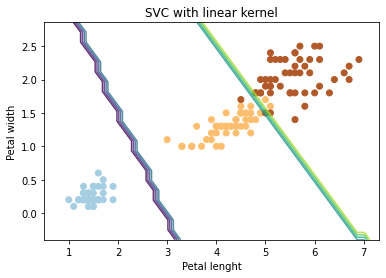

In [17]:
plt.subplot(111)
z = svc.predict(np.c_[xx.ravel(),yy.ravel()])
z = z.reshape(xx.shape)
plt.contour(xx,yy,z,cmp=plt.cm.Paired,alpha=0.8)
plt.scatter(x[:,0],x[:,1],c=y,cmap=plt.cm.Paired)
plt.xlabel('Petal lenght')
plt.ylabel('Petal width')
plt.xlim(xx.min(),xx.max())
plt.title('SVC with linear kernel')
plt.show()


In [26]:
# dividing data into training and testing and trining the model

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

svc = svm.SVC(kernel='linear', C=1 ,gamma='auto').fit(x_train,y_train)

In [27]:
# evaluating performance of the model using the testing set

classification_result = svc.predict(x_test)
print(metrics.classification_report(classification_result,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Confusion matrix, without normalization
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


/Users/carlos-theran/miniforge3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


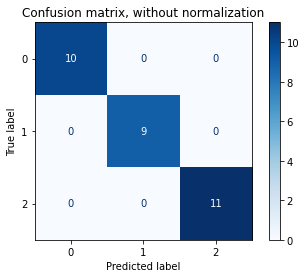

In [29]:
title_option = [("Confusion matrix, without normalization", None)]

for title, normalize in title_option:
    disp = plot_confusion_matrix(svc,x_test,y_test, cmap=plt.cm.Blues, normalize = normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)
plt.show()    

In [38]:
# Working with Self Organizer Map
from sklearn_som.som import SOM


In [40]:
som_model = SOM(m=3, n=1, dim=2)
som_model.fit(x_train)

In [42]:
result_som = som_model.predict(x_test)

In [43]:
print(metrics.classification_report(result_som,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.33      1.00      0.50         3
           2       1.00      0.65      0.79        17

    accuracy                           0.80        30
   macro avg       0.78      0.88      0.76        30
weighted avg       0.93      0.80      0.83        30

